## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results, on='Mouse ID')

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_study.groupby('Mouse ID').count())

print(f'Number of mice raw data: ',number_of_mice)

Number of mice raw data:  249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(f'number of mice: {number_of_mice}')

# Find duplicated mouse
duplicated_mouse = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicated_mouse, sep='\n')

# Drop duplicated mouse from dataframe
duplicate_mouse_ids = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

number of mice: 249
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
duplicate_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mouse_ids)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
print(f'Number of Mice after cleaning: ',len(clean_mouse_data.groupby('Mouse ID').count()))
clean_mouse_data.head()

Number of Mice after cleaning:  248


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# calculate the mean of Tumor Volume for each Regimen
tumor_volume_mean = clean_mouse_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].rename('Mean')

# calculate the median Tumor Volume of each Regimen
tumor_volume_median = clean_mouse_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].rename('Median')

# calculate the variance of Tumor Volumes
tumor_volume_var = clean_mouse_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'].rename('Variance')

# calculate the standard deviation
tumor_volume_std = clean_mouse_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'].rename('Standard_deviation')

# calculate the standard of errors for each Regimen
tumor_volume_sem = clean_mouse_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'].rename('Standard_error')

# Assemble the resulting series into a single summary dataframe.
results_df = pd.DataFrame({'mean' : tumor_volume_mean,
                           'median' : tumor_volume_median,
                           'variance': tumor_volume_var,
                           'std' : tumor_volume_std,
                           'sem' : tumor_volume_sem})
print(results_df)


                   mean     median   variance       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
agg_summary_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

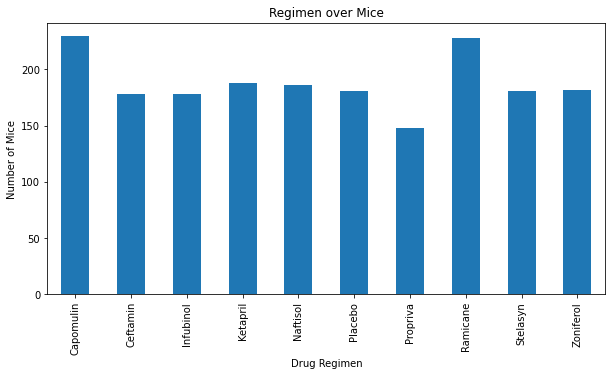

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_number_of_mice = clean_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID'].rename('Mice Count')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Drug Regimen on Number of Mice')

bar_number_of_mice.plot.bar(title='Regimen over Mice',y='Number of Mice',figsize=(10,5))


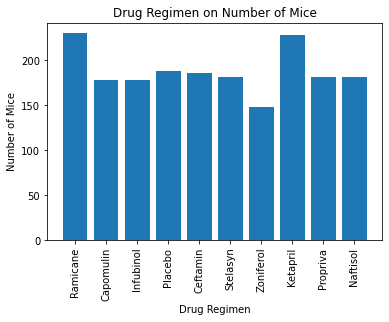

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_names = clean_mouse_data['Drug Regimen'].unique()

# Create a list indicating where to write labels and set figure size
x_axis = drug_names
y_axis = clean_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID']
tick_locations = x_axis
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Drug Regimen on Number of Mice')

#plt.figure(figsize=(10,5))

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, rotation= 90)
plt.show()

Male      958
Female    922
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Distribution of Female vs Male')

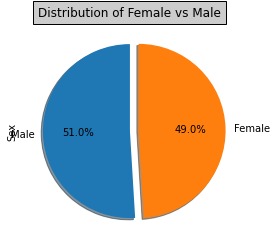

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
versus_sex = clean_mouse_data['Sex'].value_counts()
print(versus_sex)

versus_sex.plot(kind='pie',y='', autopct='%1.1f%%', startangle=90, shadow=True,explode=(0,0.1))
plt.title('Distribution of Female vs Male', bbox={'facecolor':'0.8', 'pad':5})

(-1.1091177556002698,
 1.2128639238082213,
 -1.106700641755685,
 1.1034697461867102)

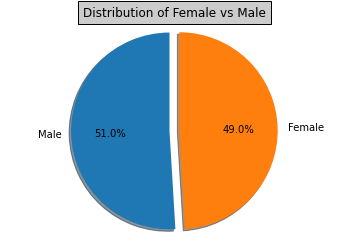

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male' , 'Female'
sizes = [958,922]
explode=(0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Distribution of Female vs Male', bbox={'facecolor':'0.8', 'pad':5})
ax1.axis('equal') 

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_df = greatest_timepoint_df.merge(clean_mouse_data,on=['Mouse ID','Timepoint'], how='left')
print(max_timepoint_df.head())

treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for name in range(len(treatment_names)):
    temp = max_timepoint_df[max_timepoint_df['Drug Regimen'] == treatment_names[name]]
    #print(f'Current Temnp: ',temp.head())

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = {'Capomulin': [],
                  'Ramicane': [],
                   'Infubinol': [], 
                   'Ceftamin': []}

#tumor_vol_final = ()

relevant_tumor = {'Capomulin': [],
            'Ramicane': [],
            'Infubinol': [], 
            'Ceftamin': []}

# Loop thru treatments
for name in treatment_names:
    # Loop thru regiments highest timepoint data
    for i in max_timepoint_df.index:
        # Append the tumor volume to the list
        if max_timepoint_df.iloc[i]['Drug Regimen'] == name:
            tumor_volume_data[name].append(max_timepoint_df.iloc[i]['Tumor Volume (mm3)'])
            #max_timepoint_df['Mouse ID','Timepoint','Drug Regumen','Tumor Volume (mm3)']
            #tumor_vol.append(max_timepoint_df.iloc[i]['Mouse ID','Timepoint','Drug Regumen','Tumor Volume (mm3)'])
            
# Create a new data frame added all values in
tumor_df = pd.DataFrame(tumor_volume_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatment_names:
    # Add subset
    subset = max_timepoint_df[max_timepoint_df['Drug Regimen']== name]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = subset['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    first_quartile = quartiles[0.25]
    second_quartile = quartiles[0.5]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    # Bounds
    lower_bound = first_quartile - (1.5*iqr)
    upper_bound = third_quartile + (1.5 *iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = max_timepoint_df.loc[(max_timepoint_df['Tumor Volume (mm3)'] <= lower_bound) | (max_timepoint_df['Tumor Volume (mm3)'] >= upper_bound)]
print(outliers)

    
    

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
96      k403         45     Ramicane    Male          21          16   
174     s185         45    Capomulin  Female           3          17   

     Tumor Volume (mm3)  Metastatic Sites  
96            22.050126                 1  
174           23.343598                 1  


{'whiskers': [<matplotlib.lines.Line2D at 0x7f945d999208>,
 'caps': [<matplotlib.lines.Line2D at 0x7f945d999908>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f945d98aeb8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f945d9a5048>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f945d9a53c8>],
 'means': []}

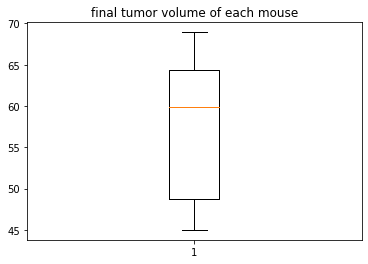

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('final tumor volume of each mouse')
ax3.boxplot(subset['Tumor Volume (mm3)'], flierprops=green_diamond)

## Line and Scatter Plots

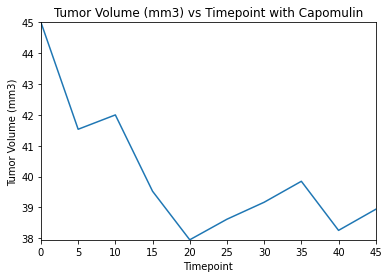

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_set = clean_mouse_data[clean_mouse_data['Drug Regimen']== 'Capomulin']

# Pick a mouse
special_mouse = capo_set.loc[capo_set['Mouse ID'] == 'b742']

# Create the X and Y axis list
timepoints = [0,5,10,15,20,25,30,35,40,45]

# Set the chart labels
plt.title('Tumor Volume (mm3) vs Timepoint with Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.xlim(0,45)
plt.ylim(special_mouse['Tumor Volume (mm3)'].min(),special_mouse['Tumor Volume (mm3)'].max())

plt.plot(special_mouse['Timepoint'],special_mouse['Tumor Volume (mm3)'])


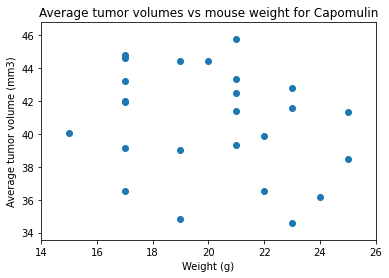

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_grouped = capo_set.groupby(['Mouse ID','Sex'])['Weight (g)']
capo_ave = capo_set.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)'].rename('Ave Volume')
capo_weight = capo_set.groupby(['Mouse ID'])['Weight (g)'].value_counts()

cap_df = capo_set.drop_duplicates(subset=['Mouse ID','Weight (g)'], keep='last')
weight_cap = cap_df['Weight (g)']

# Set the chart labels
plt.scatter(weight_cap.values,capo_ave.values)
plt.title('Average tumor volumes vs mouse weight for Capomulin')
plt.ylabel('Average tumor volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylim(capo_ave.values.min()-1,capo_ave.values.max()+1)
plt.xlim(weight_cap.values.min()-1,weight_cap.values.max()+1)

# Plot
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is -0.23


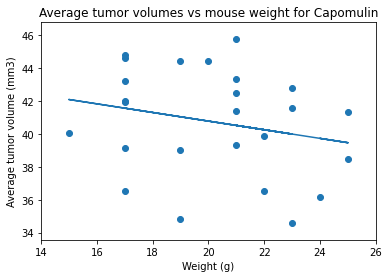

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(capo_ave.values,weight_cap.values)[0],2)}") 

# Linear Regression Model
# Perform a linear regression onmouse weight vs average tumor volume
ca_slope, ca_int, ca_r, ca_p, ca_std_err = st.linregress(weight_cap.values, capo_ave.values)

# Create equation of line to calculate predicted mouse weight
ca_fit = ca_slope * weight_cap.values + ca_int

# Plot the linear regression model on top of scatter plot
# Set the chart labels
plt.scatter(weight_cap.values,capo_ave.values)
plt.plot(weight_cap.values,ca_fit,'-')
plt.title('Average tumor volumes vs mouse weight for Capomulin')
plt.ylabel('Average tumor volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylim(capo_ave.values.min()-1,capo_ave.values.max()+1)
plt.xlim(weight_cap.values.min()-1,weight_cap.values.max()+1)

# Plot
plt.show()